In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark")

%reload_ext autoreload
%autoreload 2

In [6]:
weather = pd.read_csv ('climate_data.csv')
weather

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.00,0.00,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.00,0.00,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.00,0.00,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.00,0.00,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.00,0.00,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3897,2020-07-24,64.1,62.0,49.8,29.6,3.6,5.8,240.0,0.24,4.38,...,86.0,35.0,29.686,29.577,15.0,25.3,77.4,2020-07-24,7,0.109
3898,2020-07-25,62.8,60.0,48.1,29.7,2.5,4.0,242.0,0.33,4.47,...,90.0,36.0,29.781,29.645,8.1,17.3,77.5,2020-07-25,7,0.136
3899,2020-07-26,60.6,68.0,48.9,29.8,1.7,2.9,357.0,0.33,4.47,...,90.0,40.0,29.930,29.745,11.5,15.0,77.5,2020-07-26,7,0.185
3900,2020-07-27,61.7,64.0,47.4,29.9,2.2,4.0,66.0,0.33,4.47,...,96.0,35.0,29.941,29.781,13.8,18.4,78.2,2020-07-27,7,0.160


## 1) Swarmplot

C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\jonat\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


(array([10., 20., 30., 40., 50., 60., 70.]),
 <a list of 7 Text major ticklabel objects>)

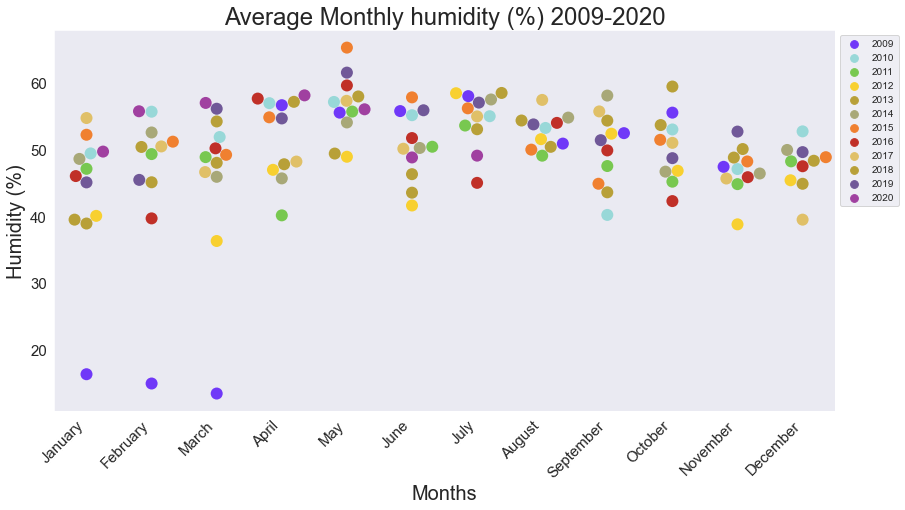

In [7]:
# Calculating data
humidity = weather
humidity["Date"] = pd.to_datetime(humidity["Date"])
humidity = humidity.set_index("Date")
humidity["Average Humidity (%)"] = (humidity["Minimum humidity (%)"] + humidity["Maximum humidity (%)"]) / 2.0
resampled_humidity = humidity["Average Humidity (%)"].resample("M").mean().to_frame()
resampled_humidity["Month"] = resampled_humidity.index.month
resampled_humidity.reset_index(inplace=True)

#Plotting

fig, ax = plt.subplots(figsize = (14,7))  
years = resampled_humidity["Date"].dt.strftime("%Y").sort_values()
palette_months = ["#7038F8", "#98D8D8", "#78C850", "#F8D030", "#B8A038", "#A8A878", "#F08030", "#C03028", "#E0C068", "#B8A038", "#705898", "#A040A0"]
fig = sns.swarmplot(x="Month", y="Average Humidity (%)", data=resampled_humidity, hue=years, size=12, edgecolor="gray", palette=palette_months)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
x_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
ax.set_xticklabels(labels=x_months, rotation=45, ha='right')

plt.ylabel("Humidity (%)", fontsize=20)
plt.xlabel("Months", fontsize=20)
plt.title("Average Monthly humidity (%) 2009-2020", fontsize=24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## 2) Barplot

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 10 Text major ticklabel objects>)

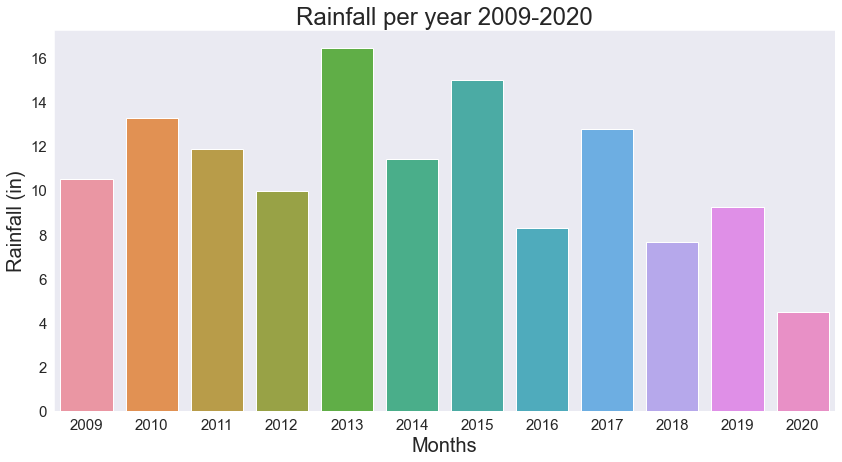

In [8]:
#Calculating data
rainfall = weather 
rainfall["Date"] = pd.to_datetime(rainfall["Date"])
rainfall = rainfall.set_index("Date")
rainfall["Year"] = rainfall.index.year

#Plotting
rainfall_resampled = rainfall.loc[rainfall.groupby([rainfall.index.to_period('Y')]).apply(lambda x: x.index.max())][["Rainfall for year (in)", "Year"]]
fig, ax = plt.subplots(figsize = (14,7)) 
fig = sns.barplot(x="Year", y="Rainfall for year (in)", data=rainfall_resampled)
plt.ylabel("Rainfall (in)", fontsize=20)
plt.xlabel("Months", fontsize=20)
plt.title("Rainfall per year 2009-2020", fontsize=24)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [13]:

# pd.to_datetime(weather)
weather.Date = pd.to_datetime(weather.Date)
#weather.info()
#extract year
weather['Year'] = weather['Date'].dt.year
#transform avg T°F in T°C
weather['Average_Temparature_°C'] = round((weather ['Average temperature (°F)']-32)/1.8)
weatherPT = weather.pivot_table(index = 'Month', columns = 'Year', values = 'Average_Temparature_°C')


## 3) Heatmap

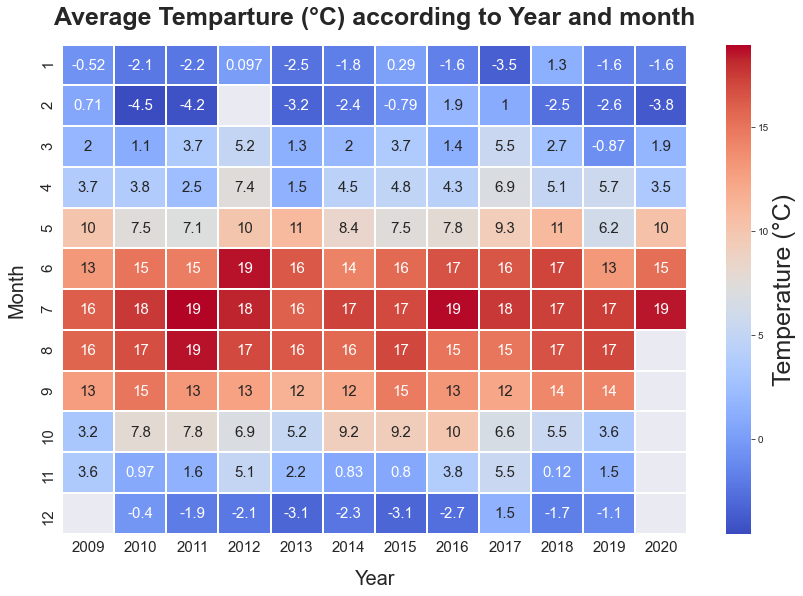

In [14]:
plt.figure(figsize=(14,9))
ax = sns.heatmap(weatherPT, cmap = 'coolwarm', linecolor = 'white', linewidth = 1, annot = True , annot_kws={"size":15})

ax.figure.axes[-1].set_ylabel('Temperature (°C)', size=25)

sns.set(font_scale=3)
cmap = sns.diverging_palette(200, 20, sep=20, as_cmap=True)


plt.xlabel('Year', labelpad=15, fontsize = 20)
plt.ylabel('Month', labelpad=15, fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Average Temparture (°C) according to Year and month' ,pad=20, fontsize = 25, weight='bold')
#cbar.set_label(label='Gust speed (kph)', size='large', weight='bold', fontsize = 20)

plt.show()


In [18]:
weather['Avg_windspeed_kph'] = weather['Average windspeed (mph)']*1.609
weather['Avg_gustspeed_kph'] = weather['Average gustspeed (mph)']*1.609
weather.loc[weather['Avg_gustspeed_kph'].idxmax()]

Date                        2010-05-19 00:00:00
Average temperature (°F)                   48.8
Average humidity (%)                         50
Average dewpoint (°F)                      30.4
Average barometer (in)                     29.7
Average windspeed (mph)                    14.8
Average gustspeed (mph)                   240.4
Average direction (°deg)                      2
Rainfall for month (in)                    1.69
Rainfall for year (in)                     5.46
Maximum rain per minute                       0
Maximum temperature (°F)                   55.9
Minimum temperature (°F)                   41.5
Maximum humidity (%)                         76
Minimum humidity (%)                         37
Maximum pressure                          29.76
Minimum pressure                         29.574
Maximum windspeed (mph)                    19.6
Maximum gust speed (mph)                    255
Maximum heat index (°F)                    55.9
Date1                                201

## 4) Polar plot

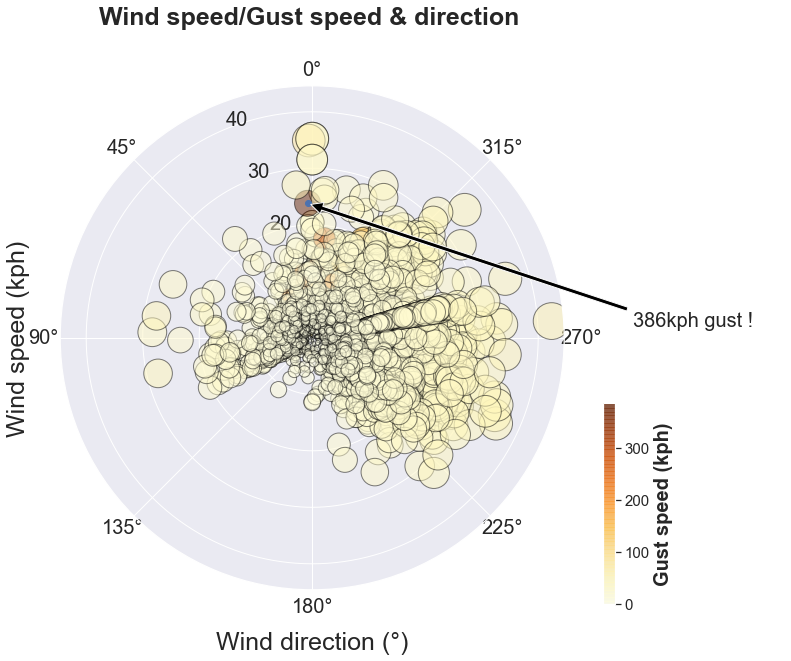

In [21]:
r = weather['Avg_windspeed_kph']
theta = np.deg2rad(weather['Average direction (°deg)'])
area = 15 * r**1.2
fig = plt.figure(figsize=(17,8))

ax = fig.add_subplot(111, projection='polar')
#ax.annotate  ('N')
colors = weather['Avg_gustspeed_kph']

sc = ax.scatter(theta,r,s = area, edgecolors='Black', alpha = 0.5,c=colors, cmap='YlOrBr')

ax.set_theta_zero_location('N')


#ax.set_xticks(np.arange(0,2.0*np.pi,np.pi/6.0))

#ax.set_ylim(0,4)
#ax.set_yticks(fontsize=15)
plt.xlabel('Wind direction (°)', labelpad=15, fontsize = 25)
plt.ylabel('Wind speed (kph)', labelpad=30, fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# 1. make colorbar
cax = fig.add_axes([0.75,0.1,0.01,0.35])
cbar = fig.colorbar(sc, cax=cax)
cbar.set_label(label='Gust speed (kph)', size='large', weight='bold', fontsize = 20)
cbar.ax.tick_params(labelsize=15)
#cbar.set_ticks(fontsize=16)
#cbar.set_label(label, fontsize=25)

# 3. move title upwards, then adjust top spacing
ax.set_title("Wind speed/Gust speed & direction ", va='bottom', y=1.1, fontsize = 25, weight='bold')
plt.subplots_adjust(top=1)

ind = 468
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('386kph gust !',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.8, 0.5),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='left',
            verticalalignment='bottom',fontsize = 20
            )

#plt.savefig("polar_coordinates_03.png", bbox_inches='tight')

plt.show()